- pm_train.csv와 pm_test.csv는 항공기 엔진에 대한 예측정비와 관련된 데이터입니다.
- 두 데이터를 읽으신 후, ttf 컬럼이 30일 이하인 경우, 정비 대상이라 고려하여 1을, 그렇지 않은 경우 0 값을 갖는 label 컬럼을 새로 만들어서 추가하세요

- setting1-setting3, 그리고 s1-s21 변수를 X 변수로 하고, label 변수를 target으로 하여, 분류모형을 이용해서 인공신경망으로 피팅해보세요.

- 피팅된 모형에 test셋을 넣어 예측하고, 예측 결과는 sklearn의 classification_report를 통해 해석해보세요.

In [52]:
import pandas as pd

df_train = pd.read_csv("pm_train.csv")
df_test = pd.read_csv("pm_test.csv")

period=30
df_train['label'] = df_train['ttf'].apply(lambda x: 1 if x <= period else 0)
df_test['label'] = df_test['ttf'].apply(lambda x: 1 if x <= period else 0)
df_train.head()


Unnamed: 0  id  cycle  setting1  setting2  setting3      s1      s2  \
0           0   1      1   -0.0007   -0.0004     100.0  518.67  641.82   
1           1   1      2    0.0019   -0.0003     100.0  518.67  642.15   
2           2   1      3   -0.0043    0.0003     100.0  518.67  642.35   
3           3   1      4    0.0007    0.0000     100.0  518.67  642.35   
4           4   1      5   -0.0019   -0.0002     100.0  518.67  642.37   

        s3       s4  ...      s14     s15   s16  s17   s18    s19    s20  \
0  1589.70  1400.60  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  1591.82  1403.14  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  1587.99  1404.20  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  1582.79  1401.87  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  1582.85  1406.22  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90   

       s21  ttf  label  
0  23.4190  191      0  
1  23.4236  190      0  
2  23.3442  189      0  
3  23.3739  188      0  
4  23.4044  187      0  

[5 rows x 29 columns]

In [53]:
df_train.isnull().mean()
df_train.label.value_counts()

0    17531
1     3100
Name: label, dtype: int64

In [54]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical #pandas의 get_dummies

scaler = MinMaxScaler()
X_train = scaler.fit_transform( df_train.iloc[ :, 3:27])
X_test = scaler.fit_transform( df_test.iloc[ :, 3:27])
y_train = to_categorical( df_train.label )
y_test = to_categorical( df_test.label )
y_test_orig = np.argmax(y_test, axis=-1)

In [55]:
from imblearn.over_sampling import SMOTE

y_train = y_train.astype('int')
X_balance,y_balance = SMOTE().fit_resample(X_train,y_train)
X_balance = pd.DataFrame(X_balance, columns = df_train.iloc[ :, 3:27].columns)

In [56]:
import matplotlib.pyplot as plt 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Accuracy Score is 0.74855
      0     1
0  9471  3293
1     0   332
[[0.74200877 0.25799123]
 [0.         1.        ]]


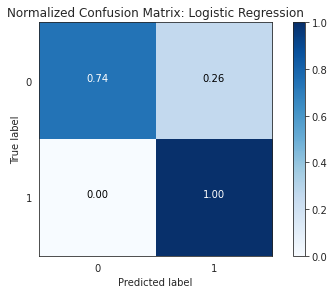

In [58]:
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(X_balance, y_balance)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_orig, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_orig,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test_orig,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')


In [59]:
LR_score = accuracy_score(y_test_orig, y_predict)
LR_percent = LR_score*100
print(f'The model accuracy is {LR_percent}%.')

The model accuracy is 74.85491753207086%.


In [60]:
#분류 보고서
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(np.argmax(y_test, axis = -1), y_predict))


               precision    recall  f1-score   support

           0       1.00      0.74      0.85     12764
           1       0.09      1.00      0.17       332

    accuracy                           0.75     13096
   macro avg       0.55      0.87      0.51     13096
weighted avg       0.98      0.75      0.83     13096



## Decision Tree

Accuracy Score is 0.78688
       0     1
0  10003  2761
1     30   302
[[0.7836885  0.2163115 ]
 [0.09036145 0.90963855]]


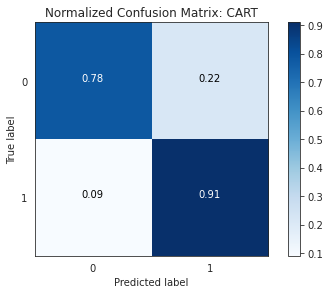

In [61]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(X_train, y_train)
y_predict = np.argmax(model.predict(X_test), axis=-1)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_orig, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_orig,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_orig,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: CART')

In [62]:
DT_score = accuracy_score(y_test_orig, y_predict)
DT_percent = DT_score*100
print(f'The model accuracy is {DT_percent}%.')

The model accuracy is 78.68814905314599%.


In [63]:
print('\n', classification_report(y_test_orig, y_predict))


               precision    recall  f1-score   support

           0       1.00      0.78      0.88     12764
           1       0.10      0.91      0.18       332

    accuracy                           0.79     13096
   macro avg       0.55      0.85      0.53     13096
weighted avg       0.97      0.79      0.86     13096



## Random Forest   

Accuracy Score is 0.93288
       0    1
0  11899  865
1     14  318
[[0.93223128 0.06776872]
 [0.04216867 0.95783133]]


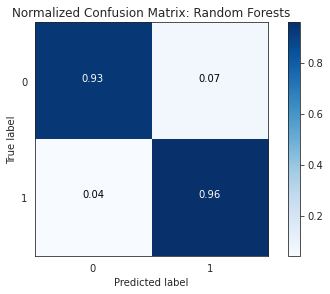

In [64]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )

model.fit(X_train, y_train)


y_predict = np.argmax(model.predict(X_test), axis=-1)


print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_orig, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_orig,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_orig,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Random Forests')

In [65]:
RF_score = accuracy_score(y_test_orig, y_predict)
RF_percent = RF_score*100
print(f'The model accuracy is {RF_percent}%.')

The model accuracy is 93.28802687843616%.


In [66]:
print('\n', classification_report(y_test_orig, y_predict))


               precision    recall  f1-score   support

           0       1.00      0.93      0.96     12764
           1       0.27      0.96      0.42       332

    accuracy                           0.93     13096
   macro avg       0.63      0.95      0.69     13096
weighted avg       0.98      0.93      0.95     13096



## SVM



Accuracy Score is 0.86897
       0     1
0  11049  1715
1      1   331
[[0.86563773 0.13436227]
 [0.00301205 0.99698795]]


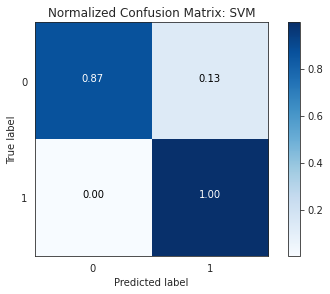

In [84]:
y_train_orig = np.argmax( y_train, axis=-1)
model = svm.SVC(C = 0.8)
model.fit(X_train, y_train_orig)
y_predict =model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test_orig, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test_orig,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test_orig,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')

In [85]:
SVM_score = accuracy_score(y_test_orig, y_predict)
SVM_percent = SVM_score*100
print(f'The model accuracy is {SVM_percent}%.')

The model accuracy is 86.89676237018938%.


In [86]:
print('\n', classification_report(y_test_orig, y_predict))


               precision    recall  f1-score   support

           0       1.00      0.87      0.93     12764
           1       0.16      1.00      0.28       332

    accuracy                           0.87     13096
   macro avg       0.58      0.93      0.60     13096
weighted avg       0.98      0.87      0.91     13096



- GridSearchCV

In [87]:
from sklearn import model_selection
#defining a set of values as a dictionary for hyperparameters

param_grid = {
    "kernel":['linear', 'rbf'],
    "gamma":[0.01,1],
    "C":[0.1,1]    
}

#declaring GridSearchCV model
model = model_selection.GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 3    
)

#model = model_selection.RandomizedSearchCV(
#    estimator = model,
#    param_distributions = param_grid,
#    scoring = 'accuracy',
#    verbose = 10,
#    n_jobs = 1,
#    cv = 5,
#    n_iter=10
#)

#fitting values to the gridsearchcv model
model.fit(X_train,y_train_orig)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START C=0.1, gamma=0.01, kernel=linear............................
[CV 1/3; 1/8] END C=0.1, gamma=0.01, kernel=linear;, score=0.963 total time=   1.3s
[CV 2/3; 1/8] START C=0.1, gamma=0.01, kernel=linear............................
[CV 2/3; 1/8] END C=0.1, gamma=0.01, kernel=linear;, score=0.957 total time=   1.3s
[CV 3/3; 1/8] START C=0.1, gamma=0.01, kernel=linear............................
[CV 3/3; 1/8] END C=0.1, gamma=0.01, kernel=linear;, score=0.955 total time=   1.3s
[CV 1/3; 2/8] START C=0.1, gamma=0.01, kernel=rbf...............................
[CV 1/3; 2/8] END C=0.1, gamma=0.01, kernel=rbf;, score=0.909 total time=   6.5s
[CV 2/3; 2/8] START C=0.1, gamma=0.01, kernel=rbf...............................
[CV 2/3; 2/8] END C=0.1, gamma=0.01, kernel=rbf;, score=0.910 total time=   6.7s
[CV 3/3; 2/8] START C=0.1, gamma=0.01, kernel=rbf...............................
[CV 3/3; 2/8] END C=0.1, gamma=0.01, ker

GridSearchCV(cv=3, estimator=SVC(C=0.8), n_jobs=1,
             param_grid={'C': [0.1, 1], 'gamma': [0.01, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=10)

In [88]:
#printing the best possible values to enhance accuracy
print(model.best_params_)
print(model.best_estimator_)
#printing the best score
print(model.best_score_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
0.9607386941980515


- optuna

In [89]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.0 MB/s 
     |████████████████████████████████| 81 kB 7.7 MB/s 
     |████████████████████████████████| 209 kB 56.3 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 147 kB 60.9 MB/s 
     |████████████████████████████████| 112 kB 65.1 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=6fa116e7924f49a68080a86d3eb98e38faa011e00bdbec6049a7d8504ea86823
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [90]:
import optuna
import sklearn

def objective(trial):
    svc_c = trial.suggest_float("C", 0.001, 1, log=True)
    svc_gamma = trial.suggest_float("gamma", 0.01, 10, log=True)
    classifier_obj = sklearn.svm.SVC(C=svc_c, gamma="auto")
    score = sklearn.model_selection.cross_val_score(classifier_obj,
                                                    X_train, y_train_orig, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)




[I 2022-11-10 21:40:13,085] A new study created in memory with name: no-name-22375936-aef5-44a0-9f4c-a9385bbca380
[I 2022-11-10 21:40:32,788] Trial 0 finished with value: 0.9570064466094713 and parameters: {'C': 0.4778131521624044, 'gamma': 2.6532708350898617}. Best is trial 0 with value: 0.9570064466094713.
[I 2022-11-10 21:40:43,249] Trial 1 finished with value: 0.9572003296010858 and parameters: {'C': 0.6322419095309555, 'gamma': 3.0341682052268877}. Best is trial 1 with value: 0.9572003296010858.
[I 2022-11-10 21:41:00,611] Trial 2 finished with value: 0.8497406814987155 and parameters: {'C': 0.001685068780847885, 'gamma': 0.4084437027371965}. Best is trial 1 with value: 0.9572003296010858.
[I 2022-11-10 21:41:14,091] Trial 3 finished with value: 0.9524986670544325 and parameters: {'C': 0.06869318597188644, 'gamma': 0.04568255474199693}. Best is trial 1 with value: 0.9572003296010858.
[I 2022-11-10 21:41:23,188] Trial 4 finished with value: 0.9569579758615676 and parameters: {'C': 

In [91]:
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9581212738112549
  Params: 
    C: 0.9981843945868182
    gamma: 0.010371148617990388


- ann

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add( Dense( 12, activation="relu", input_shape=(24,)) )
model.add( Dense( 6, activation="relu") )
model.add( Dense( 2,  activation="softmax"))

model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.fit( X_train, y_train, epochs=20)
results = model.predict( X_test)

Epoch 1/20
645/645 [==============================] - 2s 2ms/step - loss: 0.2695 - acc: 0.8968
Epoch 2/20
645/645 [==============================] - 2s 3ms/step - loss: 0.1029 - acc: 0.9566
Epoch 3/20
645/645 [==============================] - 1s 2ms/step - loss: 0.1015 - acc: 0.9562
Epoch 4/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0996 - acc: 0.9576
Epoch 5/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0982 - acc: 0.9585
Epoch 6/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0974 - acc: 0.9586
Epoch 7/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0956 - acc: 0.9594
Epoch 8/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0954 - acc: 0.9591
Epoch 9/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0940 - acc: 0.9599
Epoch 10/20
645/645 [==============================] - 1s 2ms/step - loss: 0.0936 - acc: 0.9600
Epoch 11/20
645/645 [============================

In [71]:
#분류 보고서
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       1.00      0.86      0.93     12764
           1       0.16      0.99      0.27       332

    accuracy                           0.86     13096
   macro avg       0.58      0.93      0.60     13096
weighted avg       0.98      0.86      0.91     13096

